# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [553]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.decomposition import PCA
import re # regex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import svm

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [554]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [555]:
data = {'websites': websites}

def print_exploratory(data):
    print("Data shape: \n")
    for name, d in data.items():
        num_rows, num_columns = d.shape
        print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
    print("\n Duplicates:\n")
    for name, d in data.items():
        num_duplicates = d.duplicated().sum()
        print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
    print("\n")
    for name, d in data.items():    
        unique_v = d.nunique()
        print(f'Unique Values "{name}":\n{unique_v}\n')
    for name, d in data.items():    
        typ = d.dtypes
        print(f'Data Type "{name}":\n{typ}\n')
    for name, d in data.items():    
        empty = d.isna().sum()
    for name, d in data.items():
        num_columns = d.select_dtypes(np.number).columns
        str_columns = d.select_dtypes(object).columns
        print(f'Numerical Columns "{name}": \n{num_columns}\n ')
        print(f'Non numerical Columns "{name}": \n{str_columns}\n ')
        

print_exploratory(data)


Data shape: 

Shape of "websites" : 21 columns, 1781 rows

 Duplicates:

Number of duplicates in "websites" : 0 duplicates


Unique Values "websites":
URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         8
SERVER                        238
CONTENT_LENGTH                637
WHOIS_COUNTRY                  48
WHOIS_STATEPRO                181
WHOIS_REGDATE                 890
WHOIS_UPDATED_DATE            593
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

Data Type "websites":
URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS

In [556]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [557]:
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [558]:
websites.select_dtypes(np.number).columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [559]:
# 1 - ou will create a correlation matrix using the numeric columns in the dataset.
def corr_matrix(data):
    correlations_matrix = data.select_dtypes(np.number).corr() # store our correlation matrix
    return correlations_matrix

correlations_matrix = corr_matrix(websites)
correlations_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


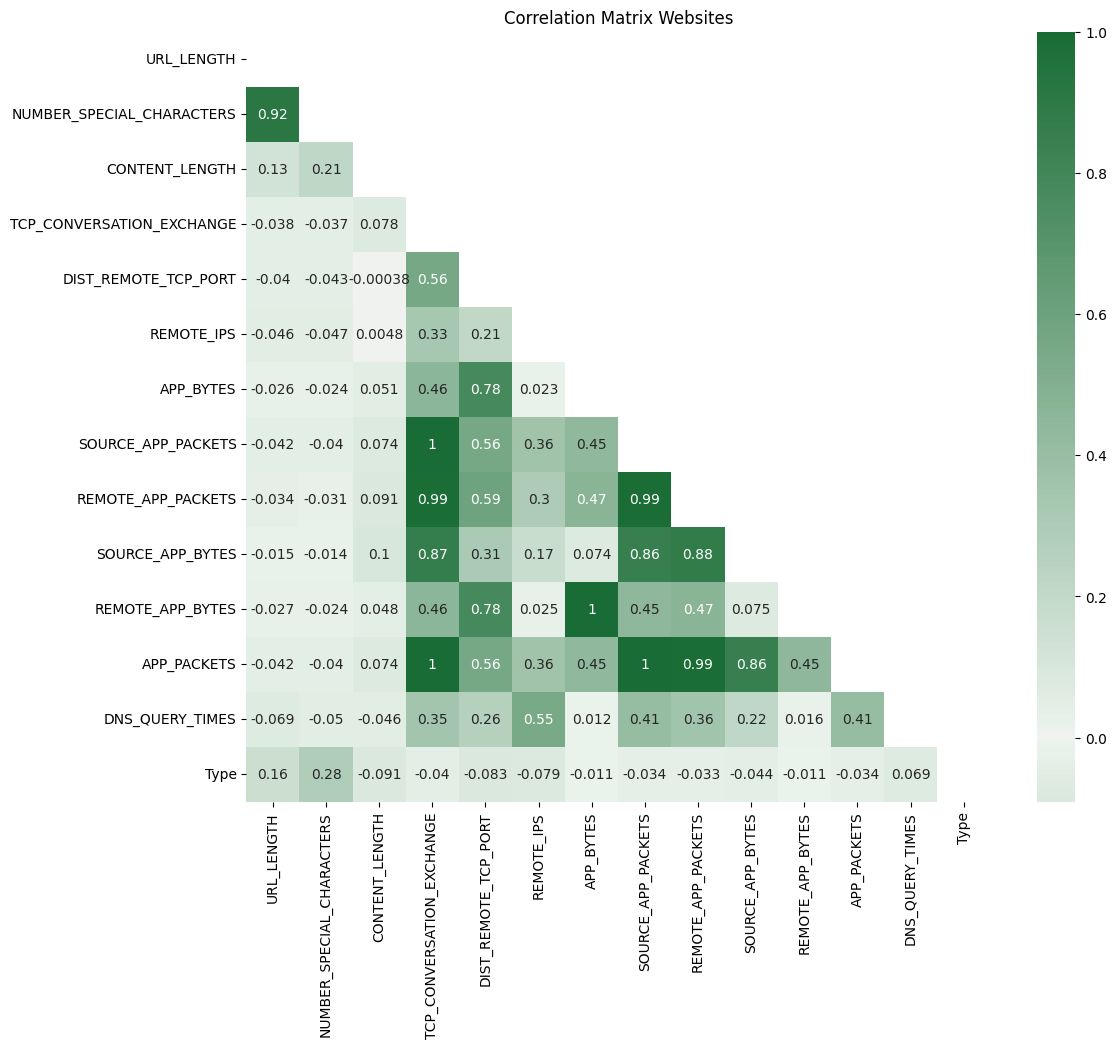

In [560]:
# 2 Create a heatmap using `seaborn` to visualize which columns have high collinearity.
def create_heatmap(data):
    correlations_matrix = corr_matrix(data)
    mask = np.triu(np.ones_like(correlations_matrix, dtype=bool))
    cmap = sns.diverging_palette(135, 135, s=90, l=40, center="light", as_cmap=True)
    plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
    ax = sns.heatmap(correlations_matrix, annot=True, cmap=cmap, center=0, mask=mask)
    ax.set_title('Correlation Matrix Websites')
    plt.show()

create_heatmap(websites)


In [561]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [562]:
# 3 . Comment on which columns you might need to remove due to high collinearity.
# One of the columns having 1 correlation with another, and very low correlations with the target "Type"

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [563]:
# Your code here

websites = websites.drop(columns=['TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES'] )



In [564]:
correlations_matrix = corr_matrix(websites) # store our correlation matrix

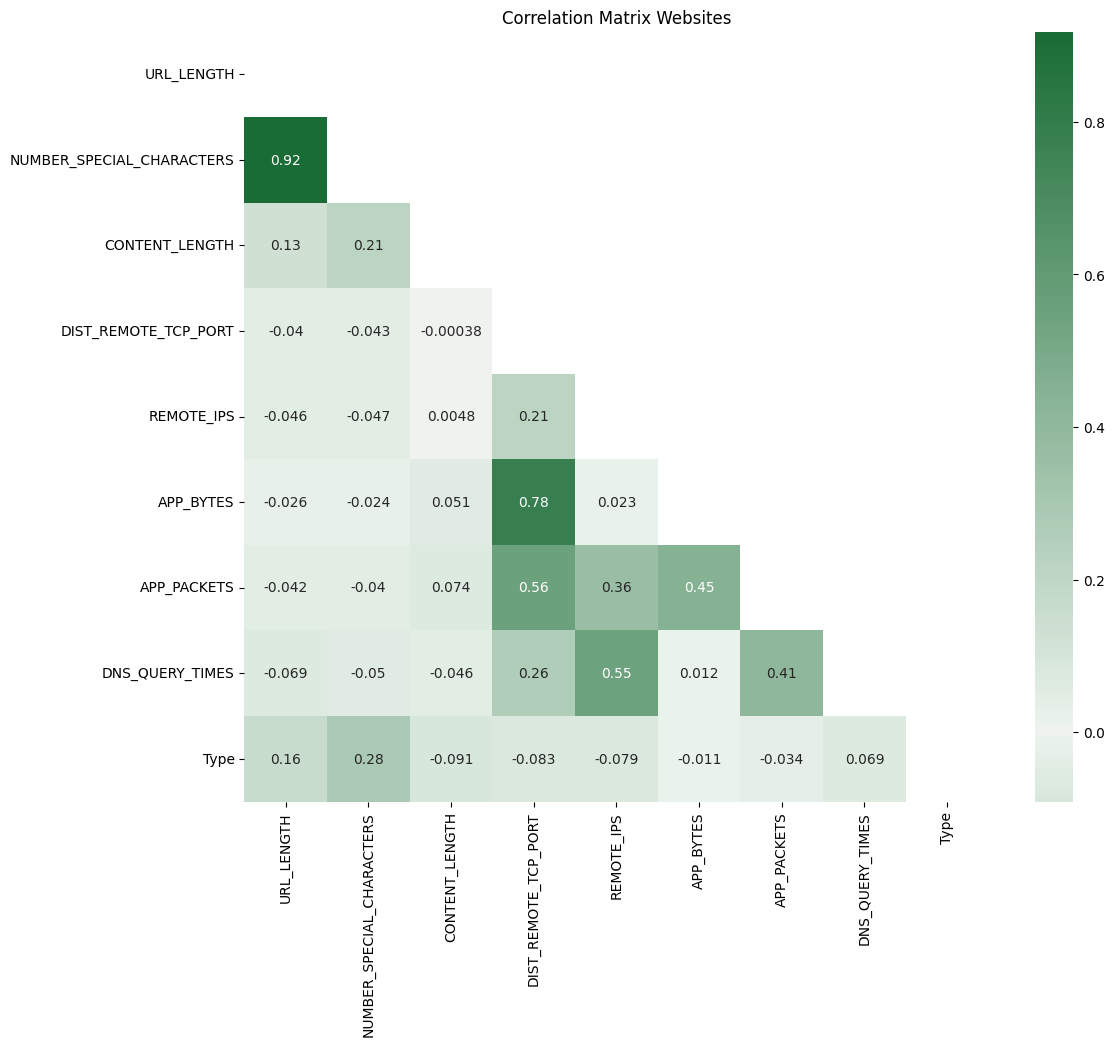

In [565]:
# 2 Create a heatmap using `seaborn` to visualize which columns have high collinearity.
create_heatmap(websites)


In [566]:
print(websites.select_dtypes(np.number).shape)
websites = websites.drop(columns=['NUMBER_SPECIAL_CHARACTERS','APP_PACKETS'])
print(websites.select_dtypes(np.number).shape)

(1781, 9)
(1781, 7)


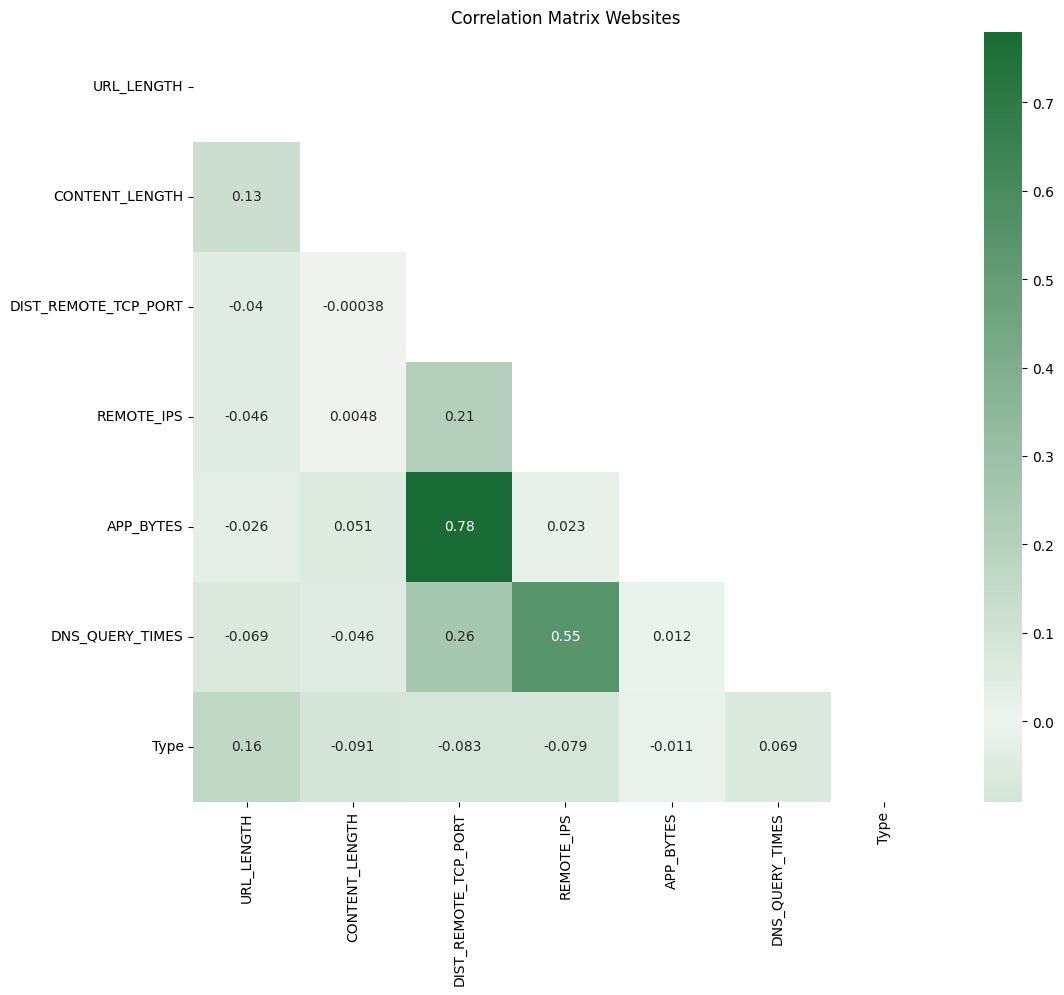

In [567]:
create_heatmap(websites)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [568]:
websites.select_dtypes(np.number).isna().sum()

URL_LENGTH                0
CONTENT_LENGTH          812
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [569]:
websites.select_dtypes(np.number)

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type
0,16,263.0,0,2,700,2.0,1
1,16,15087.0,7,4,1230,0.0,0
2,16,324.0,0,0,0,0.0,0
3,17,162.0,22,3,3812,8.0,0
4,17,124140.0,2,5,4278,4.0,0
...,...,...,...,...,...,...,...
1776,194,NaN,0,0,0,0.0,1
1777,198,NaN,0,0,0,0.0,1
1778,201,8904.0,2,6,6631,4.0,0
1779,234,NaN,0,0,0,0.0,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [570]:
websites = websites.drop(columns= 'CONTENT_LENGTH') #this column contains 812 missing values from 1781
      # 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       #'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
      # 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       #'DNS_QUERY_TIMES'], inplace=True)


In [571]:
websites.dropna(subset=['DNS_QUERY_TIMES'], inplace=True)
# df.dropna(subset=["age", "fare", "pclass", "sex"], inplace=True)

In [572]:
websites.select_dtypes(np.number).columns

Index(['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [573]:
# Your comment here
websites.shape

(1780, 13)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [574]:
# Examine missing values in each column
websites.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
DNS_QUERY_TIMES           0
Type                      0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [575]:
# 1. List out the unique values of `WHOIS_COUNTRY`.
websites["WHOIS_COUNTRY"].value_counts()
websites["WHOIS_COUNTRY"]  = websites["WHOIS_COUNTRY"].fillna("unknown")

In [576]:
websites["WHOIS_COUNTRY"].isna().sum()

0

In [577]:
country_mapping = {'Cyprus ': 'CY', 'United Kingdom': 'GB', "[u'GB'; u'UK']" : 'GB' , 'UK': 'GB'}
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.lower()
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].map(country_mapping).fillna(websites['WHOIS_COUNTRY']).str.lower()




In [578]:

websites["WHOIS_COUNTRY"].value_counts()


WHOIS_COUNTRY
us                1106
unknown            306
ca                  83
es                  63
au                  35
pa                  21
gb                  19
jp                  11
uk                  10
cn                  10
in                  10
fr                   9
cz                   9
nl                   6
ch                   6
ru                   6
[u'gb'; u'uk']       5
kr                   5
bs                   4
se                   4
at                   4
ph                   4
tr                   3
hk                   3
sc                   3
de                   3
ky                   3
be                   3
no                   2
si                   2
uy                   2
cyprus               2
ua                   2
kg                   2
il                   2
br                   2
lu                   1
ug                   1
pk                   1
it                   1
th                   1
by                   1
ae                  

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

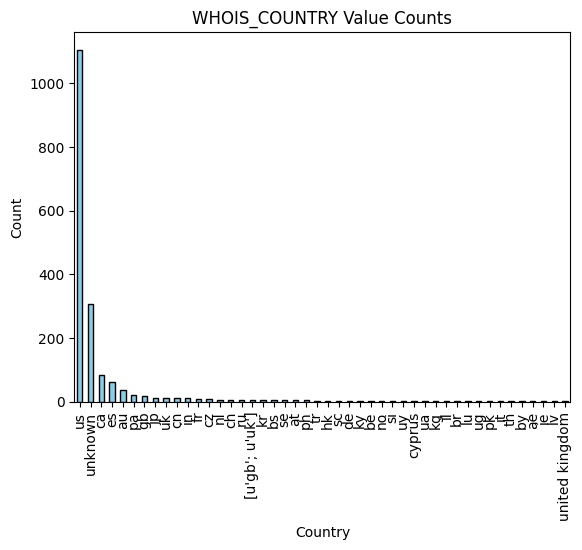

In [579]:
def plot_bar_chart_counts(data, labelx, labely, title):
# Plot a bar chart
    data.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.show()

plot_bar_chart_counts(websites['WHOIS_COUNTRY'], 'Country', 'Count', 'WHOIS_COUNTRY Value Counts')

In [580]:
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
us                1106
unknown            306
ca                  83
es                  63
au                  35
pa                  21
gb                  19
jp                  11
uk                  10
cn                  10
in                  10
fr                   9
cz                   9
nl                   6
ch                   6
ru                   6
[u'gb'; u'uk']       5
kr                   5
bs                   4
se                   4
at                   4
ph                   4
tr                   3
hk                   3
sc                   3
de                   3
ky                   3
be                   3
no                   2
si                   2
uy                   2
cyprus               2
ua                   2
kg                   2
il                   2
br                   2
lu                   1
ug                   1
pk                   1
it                   1
th                   1
by                   1
ae                  

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [581]:
# Your code here
country_counts = websites['WHOIS_COUNTRY'].value_counts()
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: 'other' if pd.isna(x) or country_counts[x] < 9 else x)
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
us         1106
unknown     306
other        88
ca           83
es           63
au           35
pa           21
gb           19
jp           11
uk           10
in           10
cn           10
fr            9
cz            9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [582]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [583]:
# Your code here
websites.dtypes


URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [584]:
# Your code here
websites.drop(columns=['URL'], inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [585]:
# Your code here
websites["CHARSET"] = websites["CHARSET"].str.lower()
websites["CHARSET"].value_counts()

CHARSET
utf-8           1054
iso-8859-1       561
us-ascii         155
windows-1251       1
iso-8859           1
windows-1252       1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [586]:
# Your code here
websites["SERVER"].value_counts()

SERVER
Apache                                                       385
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [587]:
# Your code here

websites['SERVER'] = websites['SERVER'].str.lower()
websites['SERVER'] = websites['SERVER'].replace(r".*microsoft.*", "microsoft", regex=True).replace(r".*apache.*", "apache", regex=True).replace(r".*nginx.*", "nginx", regex=True)
websites['SERVER'] = websites['SERVER'].apply(lambda x: x if (x =='microsoft' or  x =='apache' or x == "nginx") else "other")


#function replaceMultiple(text, characters){
  #for (const [i, each] of characters.entries()) {
   # const previousChar = Object.keys(each);
    #const newChar = Object.values(each);

    #text = text.replaceAll(previousChar, newChar);
  #}  
  
#return text
#}


In [588]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

SERVER
apache       642
other        504
nginx        436
microsoft    198
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [589]:

website_dummy = websites


In [590]:
# Your code here
def data_dummy(data):
    data_copy = data.copy()
    data_dummy = pd.get_dummies(data_copy, drop_first=True)
    print(data_dummy.dtypes)
    print(f"columns: \n{data_dummy.columns}")
    return data_dummy

website_dummy = data_dummy(websites)
website_dummy

URL_LENGTH                 int64
DIST_REMOTE_TCP_PORT       int64
REMOTE_IPS                 int64
APP_BYTES                  int64
DNS_QUERY_TIMES          float64
Type                       int64
CHARSET_iso-8859-1          bool
CHARSET_us-ascii            bool
CHARSET_utf-8               bool
CHARSET_windows-1251        bool
CHARSET_windows-1252        bool
SERVER_microsoft            bool
SERVER_nginx                bool
SERVER_other                bool
WHOIS_COUNTRY_ca            bool
WHOIS_COUNTRY_cn            bool
WHOIS_COUNTRY_cz            bool
WHOIS_COUNTRY_es            bool
WHOIS_COUNTRY_fr            bool
WHOIS_COUNTRY_gb            bool
WHOIS_COUNTRY_in            bool
WHOIS_COUNTRY_jp            bool
WHOIS_COUNTRY_other         bool
WHOIS_COUNTRY_pa            bool
WHOIS_COUNTRY_uk            bool
WHOIS_COUNTRY_unknown       bool
WHOIS_COUNTRY_us            bool
dtype: object
columns: 
Index(['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_Q

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,...,WHOIS_COUNTRY_es,WHOIS_COUNTRY_fr,WHOIS_COUNTRY_gb,WHOIS_COUNTRY_in,WHOIS_COUNTRY_jp,WHOIS_COUNTRY_other,WHOIS_COUNTRY_pa,WHOIS_COUNTRY_uk,WHOIS_COUNTRY_unknown,WHOIS_COUNTRY_us
0,16,0,2,700,2.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,16,7,4,1230,0.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,16,0,0,0,0.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,17,22,3,3812,8.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17,2,5,4278,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,0.0,1,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1777,198,0,0,0,0.0,1,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1778,201,2,6,6631,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1779,234,0,0,0,0.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [591]:
# Your code here
website_dummy.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,...,WHOIS_COUNTRY_es,WHOIS_COUNTRY_fr,WHOIS_COUNTRY_gb,WHOIS_COUNTRY_in,WHOIS_COUNTRY_jp,WHOIS_COUNTRY_other,WHOIS_COUNTRY_pa,WHOIS_COUNTRY_uk,WHOIS_COUNTRY_unknown,WHOIS_COUNTRY_us
0,16,0,2,700,2.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,16,7,4,1230,0.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,16,0,0,0,0.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,17,22,3,3812,8.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17,2,5,4278,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [592]:
website_dummy.dtypes

URL_LENGTH                 int64
DIST_REMOTE_TCP_PORT       int64
REMOTE_IPS                 int64
APP_BYTES                  int64
DNS_QUERY_TIMES          float64
Type                       int64
CHARSET_iso-8859-1          bool
CHARSET_us-ascii            bool
CHARSET_utf-8               bool
CHARSET_windows-1251        bool
CHARSET_windows-1252        bool
SERVER_microsoft            bool
SERVER_nginx                bool
SERVER_other                bool
WHOIS_COUNTRY_ca            bool
WHOIS_COUNTRY_cn            bool
WHOIS_COUNTRY_cz            bool
WHOIS_COUNTRY_es            bool
WHOIS_COUNTRY_fr            bool
WHOIS_COUNTRY_gb            bool
WHOIS_COUNTRY_in            bool
WHOIS_COUNTRY_jp            bool
WHOIS_COUNTRY_other         bool
WHOIS_COUNTRY_pa            bool
WHOIS_COUNTRY_uk            bool
WHOIS_COUNTRY_unknown       bool
WHOIS_COUNTRY_us            bool
dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [593]:
website_dummy.columns

Index(['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'Type', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_uk', 'WHOIS_COUNTRY_unknown', 'WHOIS_COUNTRY_us'],
      dtype='object')

In [594]:
# split:

from sklearn.model_selection import train_test_split
X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

def split(X, y):
       print(X.head())
       print(y.head())
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=7986)
       return X_train, X_test, y_train, y_test
split(X, y)



   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

(      URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
 137           29                     3           1        366   
 993           53                     5           7        762   
 983           52                     0           0          0   
 192           32                     1           4       1457   
 546           40                     1           3       2995   
 ...          ...                   ...         ...        ...   
 1726         125                    37           6       4871   
 1069          56                     0           0          0   
 494           39                     0           0          0   
 687           44                    12           4       2401   
 1319          67                     3           7        960   
 
       DNS_QUERY_TIMES  CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  \
 137               0.0               False              True          False   
 993               0.0                True      

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [595]:
# Your code here:


In [596]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]


def split_scaler_data(X, y):
    print(X.head())
    print(y.head())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=7986)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [597]:
# Your code here:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

accuracy score: 0.9129213483146067
precision_score: 1.0
recall_score: 0.3111111111111111
14


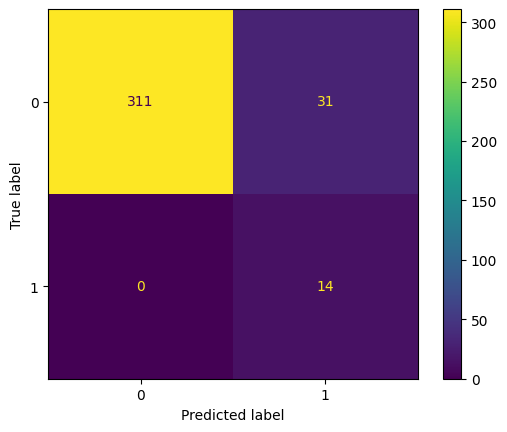

In [598]:
# Your code here:
model = LogisticRegression()
model.fit(X_train, y_train)

def predict_fonction(X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"accuracy score: {accuracy_score(y_test, y_pred)}")
    print(f"precision_score: {precision_score(y_test, y_pred)}")
    # Recall
    #(y_pred & y_test).sum() / y_test.sum()
    print(f"recall_score: {recall_score(y_test, y_pred)}")
    confusion_matrix(y_pred, y_test)
    print((y_pred & y_test).sum())
    ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()

predict_fonction(X_test, y_test)


score: 0.9129213483146067
accuracy score: 0.9129213483146067
precision_score: 1.0
recall_score: 0.3111111111111111
14


C:\Users\rober\AppData\Local\Temp\ipykernel_14184\3074198142.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result],axis=0)


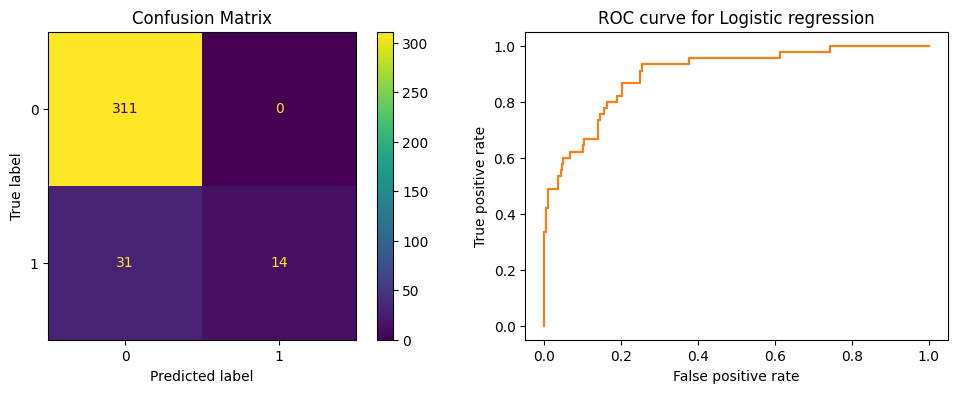

In [599]:
results = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1_score', 'false_negatives'])

model_name = "Logistic regression"
model = LogisticRegression()

def fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results):
    # fit predicts and evalueate model and add results to a table results
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Recall
    #(y_pred & y_test).sum() / y_test.sum()
    print(f"score: {score}")
    print(f"accuracy score: {accuracy}")
    print(f"precision_score: {precision}")
    print(f"recall_score: {recall}")
    confusion_matr = confusion_matrix(y_test, y_pred)
    print((y_pred & y_test).sum())
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    disp = ConfusionMatrixDisplay(confusion_matr, display_labels=model.classes_)
    disp.plot(ax=ax1)
    ax1.set_title('Confusion Matrix')
    
    #model_evaluation:
    f1 = f1_score(y_test, y_pred)
    false_negatives = confusion_matr[1][0]
    new_result = pd.DataFrame({'model_name': model_name,'accuracy':score,'precision':precision,'recall':recall,'f1_score':f1,'false_negatives':false_negatives},index=[0])   
    results = pd.concat([results, new_result],axis=0)
    print_y_score(model_name, X_test, y_test)
    return accuracy, precision, recall, y_pred, results

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results

def print_y_score(model_name, X_test, y_test):
    Y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_score)
    plt.title(f"ROC curve for {model_name}")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(fpr, tpr);

print_y_score(model_name, X_test, y_test)

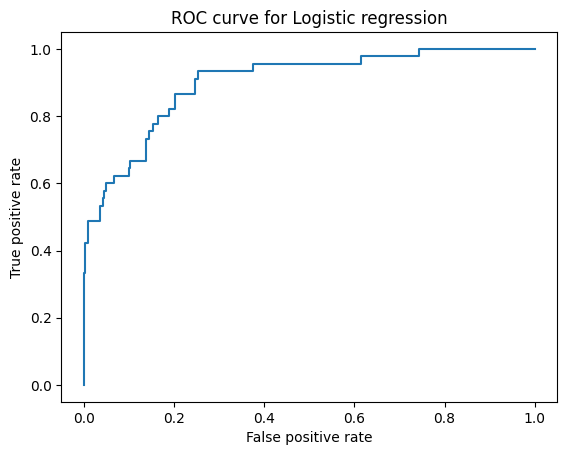

In [600]:
print_y_score("Logistic regression", X_test, y_test)

In [601]:
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.912921,1.0,0.311111,0.474576,31


In [602]:
# Recall
#(y_pred & y_test).sum() / y_test.sum()
recall_score(y_test, y_pred)

0.3111111111111111

What are your thoughts on the performance of the model? Write your conclusions below.

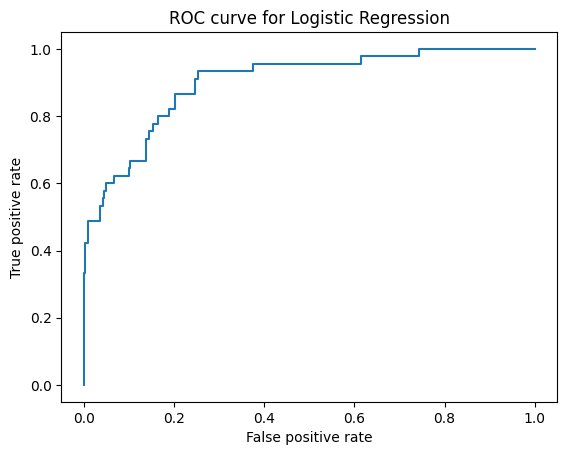

In [603]:
# Your conclusions here: still getting many false positives
# ROC curve
Y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Y_score)
plt.title("ROC curve for Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr, tpr);


In [604]:
THRESHOLD = .2
y_pred = Y_score > THRESHOLD
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.44776119402985076, 0.6666666666666666)

In [605]:
roc_auc_score(y_test, Y_score)

0.9006073597713469

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.912921,1.000000,0.311111,0.474576,31
0,KNeighborsClassifier(KNN3),0.924157,0.704545,0.688889,0.696629,14


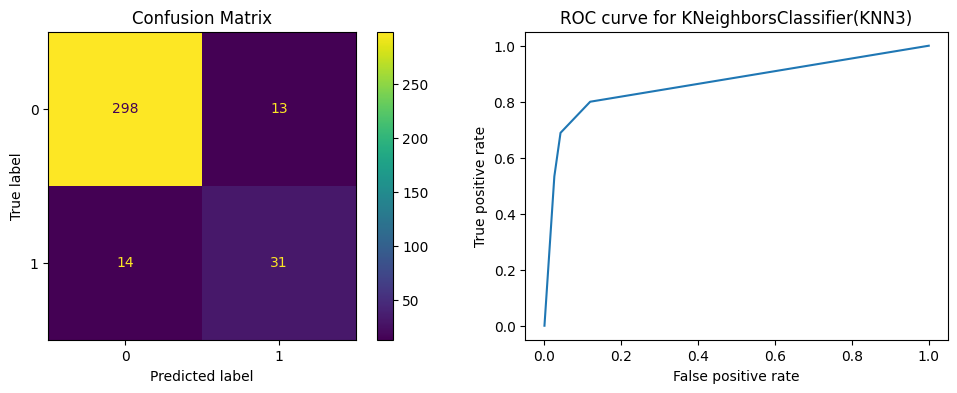

In [606]:
# K-Nearest Neighbors: Classifier implementing the k-nearest neighbors vote.


model = KNeighborsClassifier(n_neighbors=3)
model_name = "KNeighborsClassifier(KNN3)"
X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [607]:
# above

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.912921,1.000000,0.311111,0.474576,31
0,KNeighborsClassifier(KNN3),0.924157,0.704545,0.688889,0.696629,14
0,KNeighborsClassifier(KNN5),0.924157,0.725000,0.644444,0.682353,16


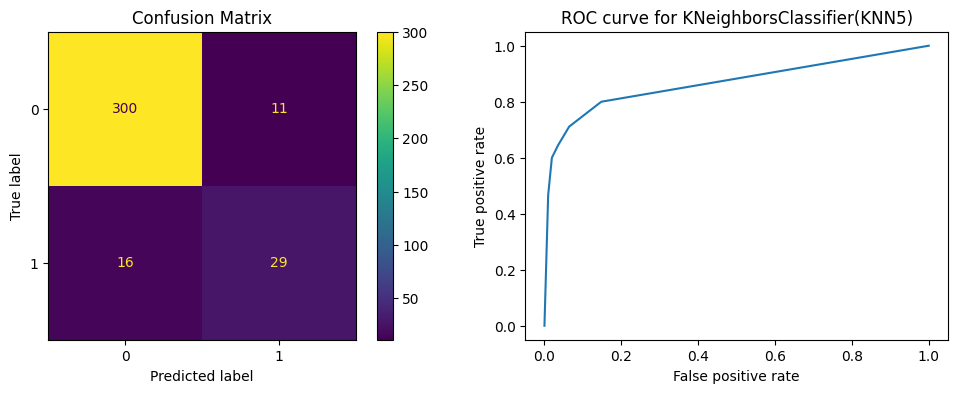

In [608]:
model = KNeighborsClassifier(n_neighbors=5)
model_name = "KNeighborsClassifier(KNN5)"
X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results


accuracy score: 0.9241573033707865
precision_score: 0.725
precision_score: 0.725
recall_score: 0.6444444444444445
29


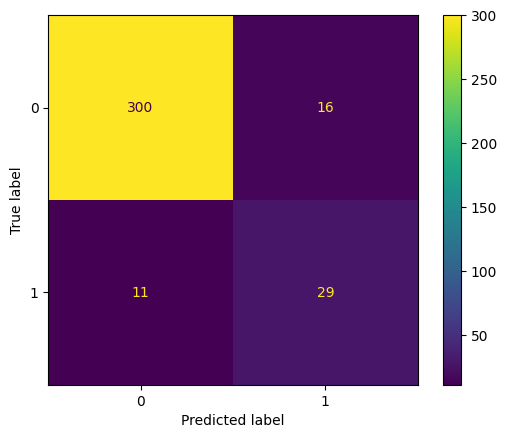

In [609]:
# Your code here:
y_pred = model.predict(X_test)
print(f"accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
confusion_matrix(y_pred, y_test)
print((y_pred & y_test).sum())
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [610]:
# Your conclusions here:
# no, the false_negatives increased by 2 and the accuracy score is the same


#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

AttributeError: predict_proba is not available when probability=False

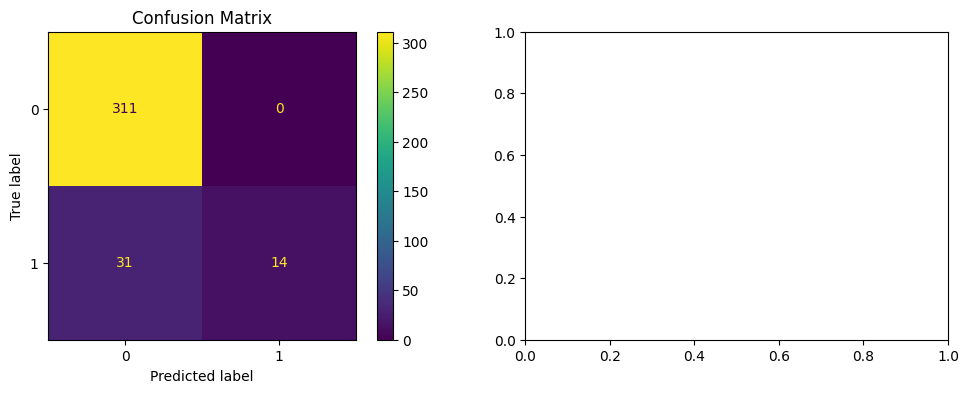

In [611]:
#svm model
from sklearn import svm
# Support Vector Classification
#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
model_name = "SupportVectorMachines(SVM)"

X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.912921,1.000000,0.311111,0.474576,31
0,KNeighborsClassifier(KNN3),0.924157,0.704545,0.688889,0.696629,14
0,KNeighborsClassifier(KNN5),0.924157,0.725000,0.644444,0.682353,16
0,RandomForestClassifier,0.955056,0.939394,0.688889,0.794872,14


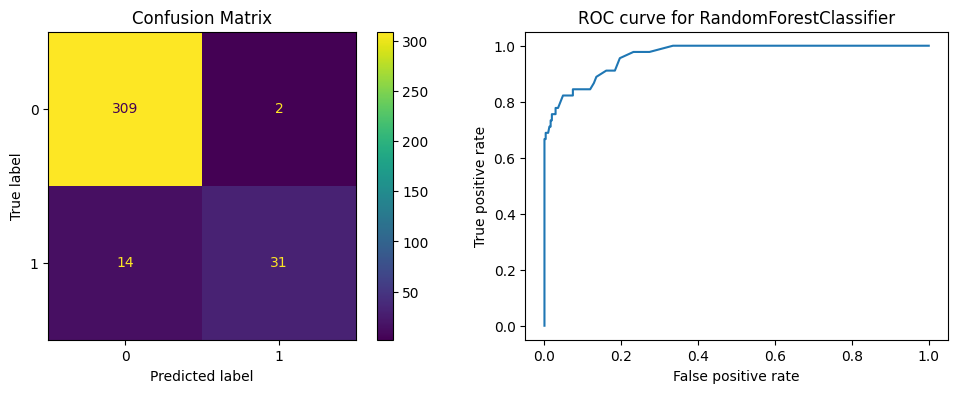

In [ ]:
# A random forest classifier.

# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

model = RandomForestClassifier()
model_name = "RandomForestClassifier"


X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

results

# print(export_text(model, feature_names=model.feature_names_in_.tolist()))

   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

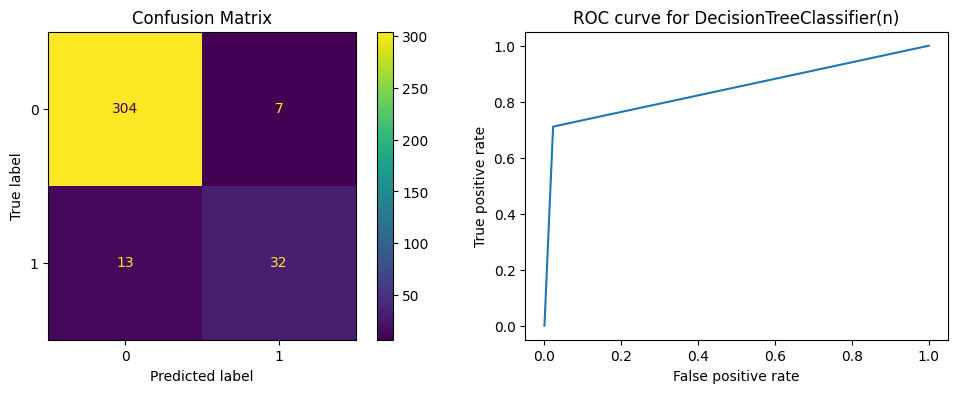

In [ ]:
model = DecisionTreeClassifier(max_depth=None)  # grow as deep a tree as possible
model_name = "DecisionTreeClassifier(n)"

X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

print(results)

print(export_text(model, feature_names=model.feature_names_in_.tolist()))


   URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  DNS_QUERY_TIMES  \
0          16                     0           2        700              2.0   
1          16                     7           4       1230              0.0   
2          16                     0           0          0              0.0   
3          17                    22           3       3812              8.0   
4          17                     2           5       4278              4.0   

   CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  CHARSET_windows-1251  \
0                True             False          False                 False   
1               False             False           True                 False   
2               False              True          False                 False   
3                True             False          False                 False   
4               False             False           True                 False   

   CHARSET_windows-1252  ...  WHOIS_COUNTRY_

InvalidParameterError: The 'decision_tree' parameter of export_text must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got ExtraTreesClassifier() instead.

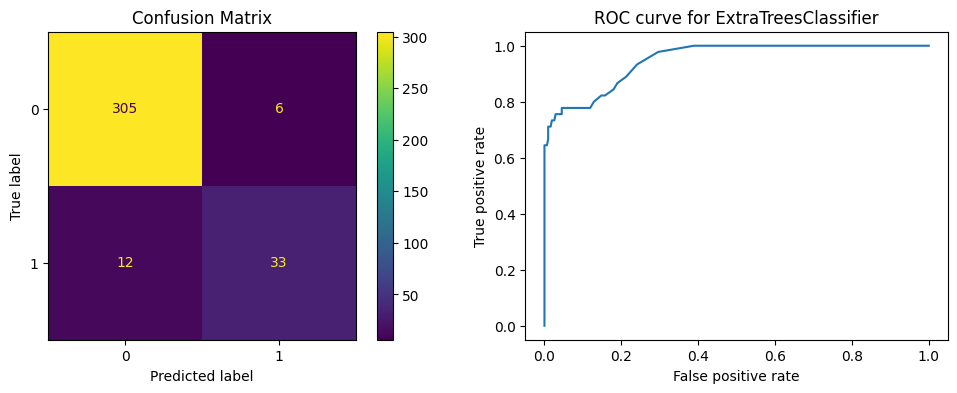

In [ ]:
# extra-trees classifier.
# This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
model = ExtraTreesClassifier()
model_name = "ExtraTreesClassifier"

X= website_dummy[['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'DNS_QUERY_TIMES', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_ca',
       'WHOIS_COUNTRY_cn', 'WHOIS_COUNTRY_cz', 'WHOIS_COUNTRY_es',
       'WHOIS_COUNTRY_fr', 'WHOIS_COUNTRY_gb', 'WHOIS_COUNTRY_in',
       'WHOIS_COUNTRY_jp', 'WHOIS_COUNTRY_other', 'WHOIS_COUNTRY_pa',
       'WHOIS_COUNTRY_us']]
y= website_dummy["Type"]

X_train, X_test, y_train, y_test = split_scaler_data(X, y)

accuracy, precision, recall, y_pred, results = fit_predict_evalueate_fonction(model_name, model, X_train, X_test, y_train, y_test, results)

print(results)

# print(export_text(model, feature_names=model.feature_names_in_.tolist()))

In [ ]:
#Y_score_train = model.predict_proba(X_train)[:,1]
#roc_auc_score(y_train, Y_score_train)



AttributeError: predict_proba is not available when probability=False

In [ ]:
# Which model is better?  # ExtraTreesClassifier, it had only 12 false_negatives
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,Logistic regression,0.912921,1.000000,0.311111,0.474576,31
0,KNeighborsClassifier(KNN3),0.924157,0.704545,0.688889,0.696629,14
0,KNeighborsClassifier(KNN5),0.924157,0.725000,0.644444,0.682353,16
0,RandomForestClassifier,0.955056,0.939394,0.688889,0.794872,14
0,DecisionTreeClassifier(n),0.943820,0.820513,0.711111,0.761905,13
0,ExtraTreesClassifier,0.949438,0.846154,0.733333,0.785714,12


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here